# Homework 8: Problems

### ASTROINFORMATICS
https://github.com/astromundus/astroinfo2018/blob/master/homework/HW8.ipynb



## Problem 1:  Unsupervised classification using GMM

Apply Gausian Mixture Model (GMM) to the 4-D data from the last week's Homework Problem: 
the g-i and u-g colors, and Amplitude and logP determined from light curves.
You can use the astroML code from textbook figure 6.6 to search for clusters
(hint: adapt the GMM code we used in notebook for Week 8 for asteroids).

Assume that there are no more than 30 physical clusters.
a) plot BIC (and AIC if you want) as a function of the assumed number of 
clusters; what is the optimal number of clusters?
b) plot logP vs. g-i diagram and overplot ellipses (1.5 sigma level as in fig. 6.6) 
outlining each class for the best number of clusters.
c) what fraction of sample belongs to the most populous cluster (hint: look at gmm_best.weights_ variable)




<br>
# Homework 8: Solutions

### Some useful definitions and functions

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm, Normalize
from scipy.stats import norm
from scipy.spatial import cKDTree
from scipy.stats import gaussian_kde
from sklearn.mixture import GaussianMixture as GMM
from sklearn.neighbors import KernelDensity
from astroML.datasets import fetch_LINEAR_geneva
from astroML.datasets import fetch_great_wall
from astroML.decorators import pickle_results
from astroML.plotting.tools import draw_ellipse
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

/home/olena/anaconda3/lib/python3.6/site-packages/sklearn/utils/fixes.py:313: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  _nan_object_mask = _nan_object_array != _nan_object_array


## Problem : Gausian Mixture Model

First obtain LINEAR data for 6,146 stars using astroML built-in function: 

In [2]:
data = fetch_LINEAR_geneva()
# N.B. this is a 7-dimensional dataset
ug = data['ug']
gi = data['gi']
logP = data['logP']
A = data['amp']
# will need for GMM clustering analysis
X = np.vstack([data['gi'], data['logP'], data['ug'], data['amp']]).T

In [3]:
N = np.arange(1, 30)
def compute_GMM(N, covariance_type='full', max_iter=100):
    models = [None for n in N]
    for i in range(len(N)):
        models[i] = GMM(n_components=N[i], max_iter=max_iter,
                        covariance_type=covariance_type)
        models[i].fit(X)
    return models

models = compute_GMM(N)
AIC = [m.aic(X) for m in models]
BIC = [m.bic(X) for m in models]
i_best = np.argmin(BIC)
gmm_best = models[i_best]

print("best fit converged:", gmm_best.converged_)
print("BIC: n_components =  %i" % N[i_best])

best fit converged: True
BIC: n_components =  19


0 3 0.144147901413
1 15 0.108389492643
2 4 0.105120866588
3 8 0.102210732846
4 9 0.101023283304
5 18 0.0661174325968
6 7 0.0636241462949
7 13 0.0499343093258
8 6 0.0421841740327
9 5 0.0415220943902
10 0 0.0349700812226
11 16 0.0327231559038
12 11 0.0299552513558
13 2 0.0271986337877
14 10 0.0232105825413
15 12 0.0129436079927
16 14 0.0121578673374
17 17 0.00207826406874
18 1 0.000488122356004


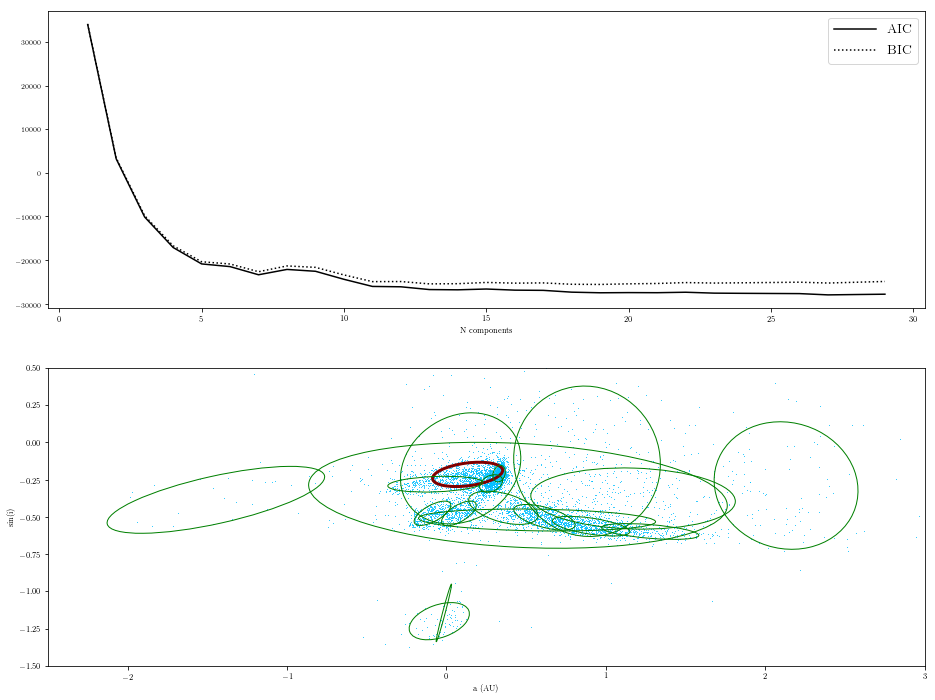

In [9]:
# Plot the results
fig = plt.figure(figsize=(14, 14))
fig.subplots_adjust(wspace=0.45, bottom=0.25, top=0.9, left=0.1, right=0.97)

# plot AIC/BIC
ax = fig.add_subplot(211)
ax.plot(N, AIC, '-k', label='AIC')
ax.plot(N, BIC, ':k', label='BIC')
ax.legend(loc=1, fontsize=14)
ax.set_xlabel('N components')
plt.setp(ax.get_yticklabels(), fontsize=7)

# plot best configurations for AIC and BIC
ax = fig.add_subplot(212)

ax.scatter(data['gi'], data['logP'], c='deepskyblue', s=1, lw=0)

ind = np.argsort(gmm_best.weights_)[::-1]
for cnt, i in enumerate(ind[:N[i_best]]):
    mu = gmm_best.means_[i]
    C = gmm_best.covariances_[i]
    w = gmm_best.weights_[i]
    print(cnt, i, w)
    draw_ellipse(mu, C, scales=[1.5], ax=ax, fc='none', lw=1.0, ec='green')
    if cnt==0:
        draw_ellipse(mu, C, scales=[1.5], ax=ax, fc='none', lw=3.0, ec='maroon')

ax.set_xlim(-2.5, 3.0)
ax.set_ylim(-1.5, 0.5)

ax.set_xlabel('a (AU)')
ax.set_ylabel('sin(i)')

plt.show()

BIC says that the optimal number of clusters is 19. The most crowded cluster that is marked by maroon circle has 14.4 % of population as can be seen from the weigth variable. Ordinary clusters are marked by green circles.